# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.


In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

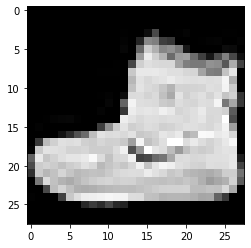

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
### Tu código aquí ###
shape_training = training_images.shape
shape_test = test_images.shape
print("Tamaño del set de entrenamiento: {}, Tamaño de cada imagen: {}X{} px".format(*shape_training))
print("Tamaño del set de test: {}, Tamaño de cada imagen: {}X{} px".format(*shape_test))

Tamaño del set de entrenamiento: 60000, Tamaño de cada imagen: 28X28 px
Tamaño del set de test: 10000, Tamaño de cada imagen: 28X28 px


Podemos ver que en el conjunto de train tenemos 60.000 imágenes y en el de test 10.000, aproximadamente el 14.3% del total, que en este caso serían 70.000. Cada imagen tiene un tamaño de 28x28 píxeles.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [ ]:
### Tu código aquí ###
### Tomamos 5 ejemplos random del set de training.

import random
for i in range(0, 5):
  index = random.randint(0,60000)
  print("---------------- \n")
  print("Ejemplo de información en Y para la posición {}: {}".format(index, training_labels[index]))
  print("Matriz de la imagen normalizada y en escala de grises:")
  np.set_printoptions(precision=2)
  print(training_images[index]) 


---------------- 

Ejemplo de información en Y para la posición 37179: 1
Matriz de la imagen normalizada y en escala de grises:
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.56 0.92 0.75 0.75 0.78 0.77 0.78 0.71 0.82 0.67 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.82 0.88 0.75 0.8  0.7  0.59 0.68 0.82 0.82 0.84 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.83 0.78 0.77 0.85 0.75 0.95 0.67 0.82 0.78 0.86 0.08 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.35 0.89 0.7  0.76 0.71 0.65 0.92 0.76 0.64 0.78 0.85 0.3  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.54 0.84 0.69 0.8  0.7  0.7  0.85 0.85 0.64 0.76 0.82 0.45 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.57 0.8  0.72 0.8  0.64 0.73 0.84 0.87 0.64 0.76 0.79 0.49 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.

Podemos ver que en cada elemento del dataset (aplica tanto para train como para test) tenemos la imagen normalizada. Para el caso de la información en *y*, tenemos un valor del 0 al 9 que indica la etiqueta de la categoría de la imagen, de acuerdo a la siguiente tabla


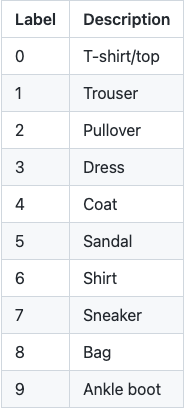

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [ ]:
### Esta opción no se usa ###
# Cambiamos la dimensión
X_train = training_images.reshape(-1, 28*28)
X_test = test_images.reshape(-1, 28*28)

y_train = training_labels
y_test = test_labels

print("Reshape X_train {}x{}".format(*X_train.shape))
print("Reshape X_test {}x{}".format(*X_test.shape))

Reshape X_train 60000x784
Reshape X_test 10000x784


In [ ]:
### Tu código para la red neuronal de la pregunta 2 aquí ###

# Definición del modelo (secuencial)
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa oculta 128 neuronas
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Usamos el optimizador adam y la métrica será la accuracy que debe superar el 80% en entrenamiento, la medida de pérdidad será sparse_categorical_crossentropy usado en problemas de clasificación
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamos con 10 epochs
model.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5237 - accuracy: 0.8183
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3919 - accuracy: 0.8594
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3511 - accuracy: 0.8735
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3244 - accuracy: 0.8824
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3046 - accuracy: 0.8886
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2905 - accuracy: 0.8931
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2770 - accuracy: 0.8974
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2661 - accuracy: 0.9009
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2594 - accuracy: 0.9042
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2496 - accuracy: 0.9081

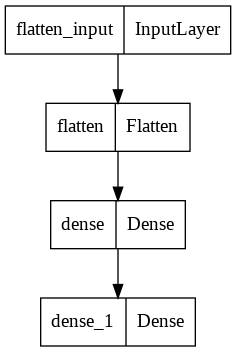

In [ ]:
tf.keras.utils.plot_model(model)

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [ ]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8751
Test accuracy: 0.8751000165939331


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

## 3: Funcionamiento de las predicción de la red neuronal

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [ ]:
### Tu código del clasificador de la pregunta 3 aquí ###

classifications = model.predict(training_images)
print(classifications[0])
print(training_labels[0])

[1.42e-11 8.81e-13 6.46e-13 3.61e-13 5.55e-10 9.07e-05 5.31e-10 2.04e-03 8.94e-09 9.98e-01]
9


Tu respuesta a la pregunta 3.1 aquí: El vector de 10 números es el resultado de la función Softmax que indica la probabilidad normalizada de cada una de las categorías posibles, es decir que todas suman 1.

In [ ]:
total =  sum(classifications[0])
print(total)

1.0000000830113753


Tu respuesta a la pregunta 3.2 aquí: Para este caso, el modelo clasifica con una probabilidad de 98.5% que este ejemplo pertenece a la última clase (índice 9). Su etiqueta es un *ankle boot* o botín, lo cual es correcto al revisar el valor en el dataset.

# **4: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [ ]:
### Tu código para 512 neuronas aquí ###
# Definición del modelo (secuencial)
model512 = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model512.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa oculta 512 neuronas
model512.add(tf.keras.layers.Dense(units=512, activation='relu'))
# Capa de salida con activación softmax
model512.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Usamos el optimizador adam y la métrica será la accuracy que debe superar el 80% en entrenamiento, la medida de pérdidad será sparse_categorical_crossentropy usado en problemas de clasificación
model512.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model512.summary()

model512.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model512.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.4849 - accuracy: 0.8289
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3667 - accuracy: 0.8670
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3256 - accuracy: 0.8805
Epoch 4/10
9

In [ ]:
### Tu código para 1024 neuronas aquí ###
# Definición del modelo (secuencial)
model1024 = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model1024.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa oculta 512 neuronas
model1024.add(tf.keras.layers.Dense(units=1024, activation='relu'))
# Capa de salida con activación softmax
model1024.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Usamos el optimizador adam y la métrica será la accuracy que debe superar el 80% en entrenamiento, la medida de pérdidad será sparse_categorical_crossentropy usado en problemas de clasificación
model1024.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1024.summary()

model1024.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model1024.evaluate(test_images, test_labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 dense_5 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.4723 - accuracy: 0.8317
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3561 - accuracy: 0.8707
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3170 - accuracy: 0.8825
Epoch 4/10
9

**pregunta 4.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal? Tu respuesta a la pregunta 4.1 aquí: En este caso el aumento de neuronas en la capa oculta no mejora la capacidad de la clasificación de la red durante el entrenamiento ni durante el test. En algunos casos el exeder el número de neuronas en las capas ocultas puede causar overfitting.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications? Para la red con 512 y 1024 sigue clasificando la imagen en la misma categoría (botín) pero esta vez con una probabilidad más alta (99.5).

**pregunta 4.3 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto? Porque el aumentar las neuronas en las capas ocultas causa que el modelo se adapte más a los datos de entrenamiento.

In [ ]:
### Tu código del clasificador de la pregunta 5 aquí ###
classifications512 = model512.predict(training_images)
print(classifications512[0])


classifications1024 = model1024.predict(training_images)
print(classifications1024[0])


[1.66e-09 1.87e-11 6.42e-12 3.97e-09 6.37e-11 1.36e-06 2.84e-09 6.26e-03 5.51e-10 9.94e-01]
[2.34e-09 6.95e-10 5.30e-11 3.02e-10 9.02e-10 1.57e-03 5.60e-09 5.58e-03 1.09e-10 9.93e-01]


# **5: Capa Flatten**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [ ]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
# Definición del modelo (secuencial)
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa oculta 128 neuronas
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Usamos el optimizador adam y la métrica será la accuracy que debe superar el 80% en entrenamiento, la medida de pérdidad será sparse_categorical_crossentropy usado en problemas de clasificación
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

ValueError: ignored

Tu respuesta a la pregunta 6 aquí: Porque la red está esperando un vector a la entrada y le hemos pasado la matriz de las imágenes, esto se podría solucionar también haciendo un reshape del conjunto de entrada.

# **6: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?:

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
# Definición del modelo (secuencial)
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa oculta 128 neuronas
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Usamos el optimizador adam y la métrica será la accuracy que debe superar el 80% en entrenamiento, la medida de pérdidad será sparse_categorical_crossentropy usado en problemas de clasificación
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 101,125
Trainable params: 101,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


InvalidArgumentError: ignored

Tu respuestas a la pregunta 6.1 aquí:  Porqué tenemos 10 categorías posibles.

Tu respuestas a la pregunta 6.2 aquí: En este caso, al intentar con 5 neuronas a la salida se genera un error de código: *Received a label value of 9 which is outside the valid range of [0, 5)*, es decir que la primera etiqueta es 9 y al ser sólo 5 neuronas no se puede calcular el error. Sin embargo el modelo podría clasificar elementos de una categoría en otra que no le pertenece en realidad y el accuracy decaería.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.30 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
### Tu código para 15 epoch aquí ###

# Definición del modelo (secuencial)
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa oculta 128 neuronas
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Usamos el optimizador adam y la métrica será la accuracy que debe superar el 80% en entrenamiento, la medida de pérdidad será sparse_categorical_crossentropy usado en problemas de clasificación
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=15, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 0.5226 - accuracy: 0.8183
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3918 - accuracy: 0.8606
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3483 - accuracy: 0.8749
Epoch 4/15
9

In [ ]:
### Tu código para 30 epoch aquí ###

# Definición del modelo (secuencial)
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa oculta 128 neuronas
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Usamos el optimizador adam y la métrica será la accuracy que debe superar el 80% en entrenamiento, la medida de pérdidad será sparse_categorical_crossentropy usado en problemas de clasificación
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=30, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
938/938 [==============================] - 3s 3ms/step - loss: 0.5215 - accuracy: 0.8182
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3921 - accuracy: 0.8614
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3522 - accuracy: 0.8730
Epoch 4/30
9

Tu respuesta a la pregunta 7.3 aquí: Podemos ver que al aumentar los epochs la red aprende más del conjunto de entrenamiento, pero cae en el riesgo de perder su capacidad de generalización, es decir, sufrir de overfitting. En el caso de 30 epochs la diferencia entre la medida de accuracy entre entrenamiento y test es más grande que las dos anteriores (10 y 15)

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.4):
              print("\nAlcanzado el 40% de pérdida, ¡Se finaliza el entrenamiento!")
              self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [ ]:
### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

# Asignacion del callback
callbacks = myCallback()
# Definición del modelo (secuencial)
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa oculta 128 neuronas
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Usamos el optimizador adam y la métrica será la accuracy que debe superar el 80% en entrenamiento, la medida de pérdidad será sparse_categorical_crossentropy usado en problemas de clasificación
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=30, batch_size=64, callbacks=[callbacks])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
938/938 [==============================] - 3s 3ms/step - loss: 0.5309 - accuracy: 0.8155
Epoch 2/30
930/938 [============================>.] - ETA: 0s - loss: 0.3911 - accuracy: 0.8613
Alcanzado el 40% de pérdida, ¡Se finaliza el entrenamiento!
938/938 [==============================] - 3s 3ms/step -

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
## Tu código y comentarios de texto aquí

# Modelo nuevamente usando ReLU y mas capas ocultas para compararlo más adelante
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=124, activation='relu'))
model.add(tf.keras.layers.Dense(units=48, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_relu = model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.5306 - accuracy: 0.8104
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3783 - accuracy: 0.8615
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3439 - accuracy: 0.8739
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3189 - accuracy: 0.8825
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3034 - accuracy: 0.8868
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2862 - accuracy: 0.8933
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2751 - accuracy: 0.8974
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2656 - accuracy: 0.9001
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2553 - accuracy: 0.9046
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.8809

In [ ]:
# Modelo usando sigmoide 
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=124, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=48, activation='sigmoid'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sigmoid = model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.9274 - accuracy: 0.6729
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4590 - accuracy: 0.8372
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3873 - accuracy: 0.8607
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3543 - accuracy: 0.8728
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3338 - accuracy: 0.8800
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3200 - accuracy: 0.8839
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3081 - accuracy: 0.8885
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2983 - accuracy: 0.8907
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2898 - accuracy: 0.8948
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8766

In [ ]:
# Modelo usando tanh 
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=64, activation='tanh'))
model.add(tf.keras.layers.Dense(units=124, activation='tanh'))
model.add(tf.keras.layers.Dense(units=48, activation='tanh'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_tanh =  model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4994 - accuracy: 0.8224
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3745 - accuracy: 0.8657
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3390 - accuracy: 0.8763
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3162 - accuracy: 0.8837
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3004 - accuracy: 0.8898
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2859 - accuracy: 0.8939
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2747 - accuracy: 0.8979
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2642 - accuracy: 0.9021
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2565 - accuracy: 0.9041
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8818

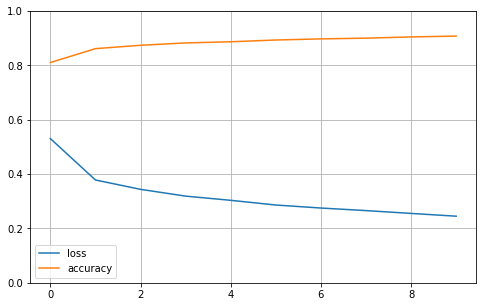

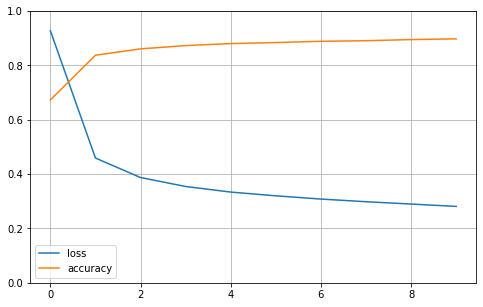

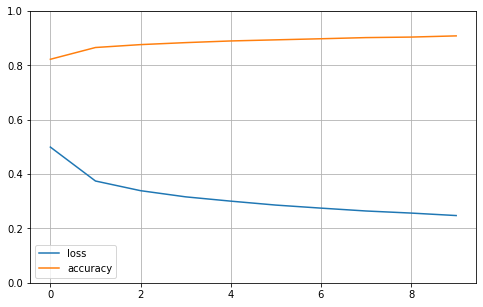

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_relu.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

pd.DataFrame(history_sigmoid.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


pd.DataFrame(history_tanh.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Podemos observar que cómo era de esperar, usando ReLu se obtienen entrenamientos más rápidos debido a su menor costo computacional, también vemos que la red que usa la activación sigmoide tarda más en converger.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
# Modelo con inicialización con ceros

model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=64, activation = 'relu', 
                                kernel_initializer = keras.initializers.Zeros(),
                                bias_initializer = keras.initializers.Zeros()))
model.add(tf.keras.layers.Dense(units=124, activation='relu',
                                kernel_initializer = keras.initializers.Zeros(),
                                bias_initializer = keras.initializers.Zeros()))
model.add(tf.keras.layers.Dense(units=48, activation='relu',
                                kernel_initializer = keras.initializers.Zeros(),
                                bias_initializer = keras.initializers.Zeros()))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_izeros = model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0981
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0987
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0963
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0974
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0993
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0968
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0980
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0972
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0992
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000

In [ ]:
# Modelo con inicialización usando una variable aleatoria normal
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=64, activation = 'relu', 
                                kernel_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),
                                bias_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(units=124, activation='relu', 
                                kernel_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),
                                bias_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(units=48, activation='relu', 
                                kernel_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),
                                bias_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_inormal = model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.6003 - accuracy: 0.7820
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4049 - accuracy: 0.8528
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3630 - accuracy: 0.8679
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3363 - accuracy: 0.8763
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3174 - accuracy: 0.8824
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3010 - accuracy: 0.8882
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2871 - accuracy: 0.8922
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2768 - accuracy: 0.8952
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2673 - accuracy: 0.8987
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8747

In [ ]:
# Modelo con inicialización por defecto de Keras
model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=64, activation = 'relu', 
                                kernel_initializer = keras.initializers.glorot_uniform(seed=None),
                                bias_initializer = keras.initializers.glorot_uniform(seed=None)))
model.add(tf.keras.layers.Dense(units=124, activation='relu', 
                                kernel_initializer = keras.initializers.glorot_uniform(seed=None),
                                bias_initializer = keras.initializers.glorot_uniform(seed=None)))
model.add(tf.keras.layers.Dense(units=48, activation='relu', 
                                kernel_initializer = keras.initializers.glorot_uniform(seed=None),
                                bias_initializer = keras.initializers.glorot_uniform(seed=None)))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_idefault = model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5392 - accuracy: 0.8087
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3785 - accuracy: 0.8615
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3452 - accuracy: 0.8721
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3199 - accuracy: 0.8818
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3047 - accuracy: 0.8861
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2893 - accuracy: 0.8921
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2778 - accuracy: 0.8964
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2688 - accuracy: 0.8986
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2572 - accuracy: 0.9022
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3167 - accuracy: 0.8847

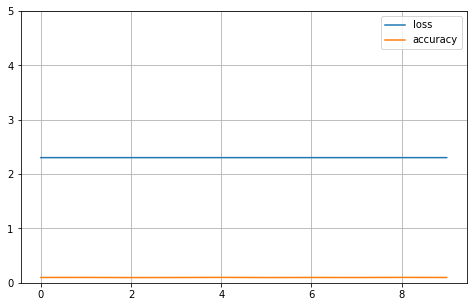

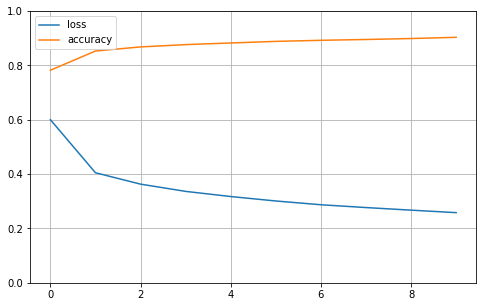

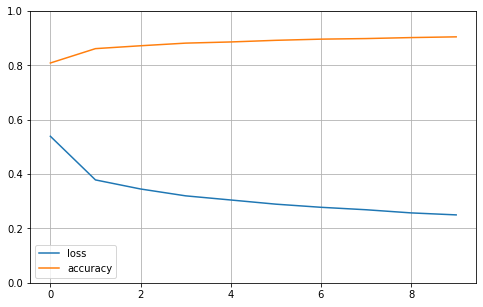

In [ ]:
pd.DataFrame(history_izeros.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,5)
plt.show()

pd.DataFrame(history_inormal.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


pd.DataFrame(history_idefault.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Podemos ver porqué inicializar con ceros no es buena idea, en este caso la mejor configuración se genera al usar la dada por defecto en Keras.

## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [ ]:
# Usando SGD

from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01, momentum=0.9)

model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=124, activation='relu'))
model.add(tf.keras.layers.Dense(units=48, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_osgd = model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.6027 - accuracy: 0.7809
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4058 - accuracy: 0.8531
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3702 - accuracy: 0.8645
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3424 - accuracy: 0.8739
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3241 - accuracy: 0.8806
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3128 - accuracy: 0.8852
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2979 - accuracy: 0.8900
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2907 - accuracy: 0.8913
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2801 - accuracy: 0.8964
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8813

In [ ]:
# Usando RMSProp

from tensorflow.keras.optimizers import RMSprop
rmsprop = RMSprop()

model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=124, activation='relu'))
model.add(tf.keras.layers.Dense(units=48, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_orms = model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5552 - accuracy: 0.8002
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3914 - accuracy: 0.8570
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3534 - accuracy: 0.8712
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3306 - accuracy: 0.8794
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3154 - accuracy: 0.8846
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3012 - accuracy: 0.8906
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2933 - accuracy: 0.8921
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2851 - accuracy: 0.8956
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2804 - accuracy: 0.8973
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4082 - accuracy: 0.8642

In [ ]:
# Usando Adam

model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=124, activation='relu'))
model.add(tf.keras.layers.Dense(units=48, activation='relu'))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_oadam = model.fit(training_images, training_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5321 - accuracy: 0.8115
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3828 - accuracy: 0.8617
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3440 - accuracy: 0.8730
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3152 - accuracy: 0.8839
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2986 - accuracy: 0.8884
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2855 - accuracy: 0.8939
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2751 - accuracy: 0.8971
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2644 - accuracy: 0.9011
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2570 - accuracy: 0.9035
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.8829

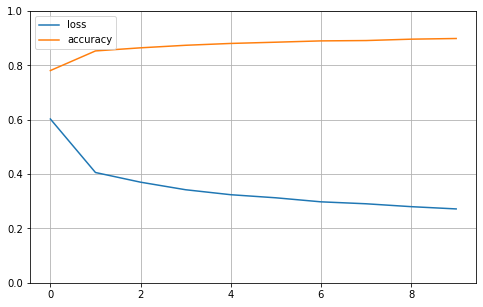

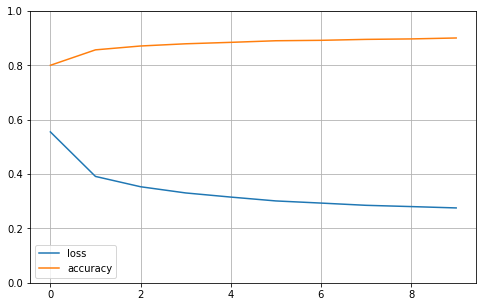

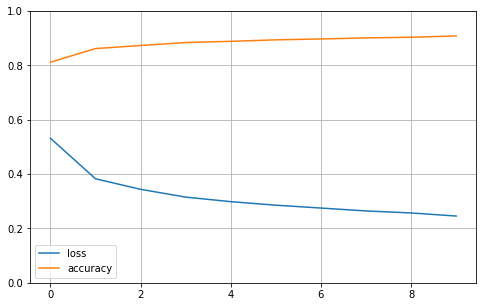

In [ ]:
pd.DataFrame(history_osgd.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

pd.DataFrame(history_orms.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


pd.DataFrame(history_oadam.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Podemos ver que aunque Adam comienza con un poco más de pérdida, produce buenos resultados, sobretodo al comparar su resultado en el conjunto de test.

## 12. Regularización y red final *(1.25 puntos)*

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [ ]:
## Tu modelo y comentarios de texto aquí
from keras.layers import Dropout

model = tf.keras.models.Sequential()
# Capa flatten (es la primera y transforma las matrices a vectores)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(units=124, activation='relu', 
                                kernel_initializer = keras.initializers.glorot_uniform(seed=None),
                                bias_initializer = keras.initializers.glorot_uniform(seed=None)))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(units=512, activation='relu', 
                                kernel_initializer = keras.initializers.glorot_uniform(seed=None),
                                bias_initializer = keras.initializers.glorot_uniform(seed=None)))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(units=124, activation='relu', 
                                kernel_initializer = keras.initializers.glorot_uniform(seed=None),
                                bias_initializer = keras.initializers.glorot_uniform(seed=None)))
model.add(Dropout(0.1))
# Capa de salida con activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model.summary()

model.fit(training_images, training_labels, epochs=15, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/15
938/938 [==============================] - 6s 6ms/step - loss: 0.5244 - accuracy: 0.8122 - val_loss: 0.4376 - val_accuracy: 0.8392
Epoch 2/15
938/938 [==============================] - 5s 6ms/step - loss: 0.3898 - accuracy: 0.8575 - val_loss: 0.4047 - val_accuracy: 0.8495
Epoch 3/15
938/938 [==============================] - 5s 6ms/step - loss: 0.3570 - accuracy: 0.8683 - val_loss: 0.3550 - val_accuracy: 0.8730
Epoch 4/15
938/938 [==============================] - 5s 6ms/step - loss: 0.3336 - accuracy: 0.8759 - val_loss: 0.3479 - val_accuracy: 0.8740
Epoch 5/15
938/938 [==============================] - 5s 6ms/step - loss: 0.3143 - accuracy: 0.8828 - val_loss: 0.3483 - val_accuracy: 0.8737
Epoch 6/15
938/938 [==============================] - 5s 6ms/step - loss: 0.3025 - accuracy: 0.8874 - val_loss: 0.3604 - val_accuracy: 0.8709
Epoch 7/15
938/938 [==============================] - 5s 6ms/step - loss: 0.2929 - accuracy: 0.8902 - val_loss: 0.3353 - val_accuracy: 0.8797
Epoch 